# Understanding Environmental Justice Indexes with Python

# Part 1: Data Loading and Initial Exploration

In [3]:
import pandas as pd
data = pd.read_csv('United States.csv')
print(data.head())

   STATEFP  COUNTYFP  TRACTCE              AFFGEOID       GEOID   NAME  \
0        1         1    20100  1400000US01001020100  1001020100  201.0   
1        1         1    20200  1400000US01001020200  1001020200  202.0   
2        1         1    20300  1400000US01001020300  1001020300  203.0   
3        1         1    20400  1400000US01001020400  1001020400  204.0   
4        1         1    20500  1400000US01001020500  1001020500  205.0   

    COUNTY StateAbbr StateDesc                                   Location  \
0  Autauga        AL   Alabama  Census Tract 201, Autauga County, Alabama   
1  Autauga        AL   Alabama  Census Tract 202, Autauga County, Alabama   
2  Autauga        AL   Alabama  Census Tract 203, Autauga County, Alabama   
3  Autauga        AL   Alabama  Census Tract 204, Autauga County, Alabama   
4  Autauga        AL   Alabama  Census Tract 205, Autauga County, Alabama   

   ...  EP_BPHIGH  EP_ASTHMA  EP_CANCER  EP_MHLTH  EP_DIABETES  EPL_BPHIGH  \
0  ...       3

Inspecting the first few rows is important because it helps check for missing values, ensures that the data has been loaded correctly,
and verifies that the column names are formatted properly. It also provides an overview of the number of rows and columns in the dataset. 
Additionally, this initial inspection helps identify any data type issues, such as numeric values being stored as text or other unexpected data formats.

# Part 2: Working with SPL Columns

## Filtering SPL Columns:

In [5]:
#create the new dataframe
spl = data.filter(regex='^SPL', axis=1)

# Display the new DataFrame
print(spl.head())


   SPL_EJI  SPL_SER  SPL_EBM_THEME1  SPL_EBM_THEME2  SPL_EBM_THEME3  \
0   1.1229   0.9229          2.1531          0.5940          1.9346   
1   1.9108   1.1108          2.1998          0.6609          1.7326   
2   1.6226   1.0226          2.2967          0.5157          1.7550   
3   1.1659   0.7659          2.4259          0.3978          2.0880   
4   0.9289   0.9289          2.4915          0.4588          1.6598   

   SPL_EBM_THEME4  SPL_EBM_THEME5  SPL_EBM  SPL_SVM_DOM1  SPL_SVM_DOM2  \
0          1.1597             0.0   5.8414        0.3243        3.6376   
1          0.9368             0.0   5.5301        0.7564        4.4555   
2          1.3287             0.0   5.8961        0.5537        3.2509   
3          1.2016             0.0   6.1133        0.2092        2.2288   
4          1.1335             0.0   5.7436        0.4921        2.7432   

   SPL_SVM_DOM3  SPL_SVM_DOM4  SPL_SVM  
0        1.6464        0.8763   6.4846  
1        1.3666        1.5249   8.1034  
2    

In environmental justice, SPL (Social and Environmental Performance Layer) columns represent key indicators that assess environmental burdens, social vulnerabilities, and health impacts within communities.

These columns are part of the Environmental Justice Index (EJI) framework, helping identify areas that face significant environmental and social risks. For instance, 
SPL_EJI gives an overall score combining environmental, social, and health factors to indicate cumulative impacts on communities.
SPL_SER focuses specifically on social and environmental risk without including health outcomes, useful for analyzing non-health-specific issues. Modules such as SPL_EBM (Environmental Burden Module) and SPL_SVM (Social Vulnerability Module) further detail specific factors, like pollution exposure or socioeconomic challenges. Themed columns (e.g., SPL_EBM_THEME1) address focused aspects like air quality, housing, or access to green spaces. 




## Adding Additional Columns

In [7]:
# Adding columns from the original DataFrame to spl
new_columns = data[['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'StateAbbr', 'Location']]

# Concatenate the new columns with the SPL columns
con_new= pd.concat([new_columns, spl], axis=1)

print(con_new.head())


   STATEFP  COUNTYFP  TRACTCE              AFFGEOID       GEOID   NAME  \
0        1         1    20100  1400000US01001020100  1001020100  201.0   
1        1         1    20200  1400000US01001020200  1001020200  202.0   
2        1         1    20300  1400000US01001020300  1001020300  203.0   
3        1         1    20400  1400000US01001020400  1001020400  204.0   
4        1         1    20500  1400000US01001020500  1001020500  205.0   

  StateAbbr StateDesc                                   Location  SPL_EJI  \
0        AL   Alabama  Census Tract 201, Autauga County, Alabama   1.1229   
1        AL   Alabama  Census Tract 202, Autauga County, Alabama   1.9108   
2        AL   Alabama  Census Tract 203, Autauga County, Alabama   1.6226   
3        AL   Alabama  Census Tract 204, Autauga County, Alabama   1.1659   
4        AL   Alabama  Census Tract 205, Autauga County, Alabama   0.9289   

   ...  SPL_EBM_THEME2  SPL_EBM_THEME3  SPL_EBM_THEME4  SPL_EBM_THEME5  \
0  ...          0.

The additional columns in the SPL DataFrame, such as 'STATEFP', 'COUNTYFP', and 'TRACTCE', are vital for providing geographical context. 
They help pinpoint specific areas down to the census tract level, facilitating localized analysis.
Meanwhile, columns like AFFGEOID and GEOID offer standardized geographic codes, which are beneficial for merging this dataset with others or conducting geospatial analyses. By including the columns like StateAbbr and Location ,we can identify the state associated with each record. It’s particularly useful when analyzing data across multiple states, allowing for easy filtering or grouping by state and Location provides a descriptive name for the location, typically including the census tract, county, and state.


#  Part 3: Data Cleaning

## Checking for Missing Data

In [15]:
m_val = data.isnull().sum()

missing_values = m_val[m_val > 0].reset_index()
missing_values.columns = ['Column', 'Missing Values Count']

print(missing_values)

          Column  Missing Values Count
0      StateAbbr                   480
1        SPL_EJI                   656
2        RPL_EJI                   656
3        SPL_SER                   609
4        RPL_SER                   609
..           ...                   ...
79    EPL_BPHIGH                   480
80    EPL_ASTHMA                   480
81    EPL_CANCER                   480
82  EPL_DIABETES                   480
83     EPL_MHLTH                   480

[84 rows x 2 columns]


Addressing missing data in your analysis is essential for several reasons. First, it ensures accuracy by preventing biased results and incorrect conclusions. Second, it maintains the validity of statistical tests and models, ensuring reliable findings. Third, it enhances interpretability, making your analysis clearer and more understandable. Fourth, it improves generalizability, ensuring your results apply to broader contexts.

## Removing Missing Data

In [21]:
original_rows = data.shape[0]
print(f"Number of rows before cleaning: {original_rows}")

# Remove rows with missing values
data_clean = data.dropna()

# Print the number of rows after cleaning
cleaned = data_clean.shape[0]
print(f"Number of rows after cleaning: {cleaned}")

Number of rows before cleaning: 72333
Number of rows after cleaning: 71677


Removing rows with missing values can simplify data processing and analysis but may lead to the loss of valuable information. In this assignment we removed 656 rows.
Removing missing values eliminate the need to handle imputation or complex analyses that account for missing data.
It can also make certain types of modeling (e.g., regression models) easier, as many algorithms do not handle missing values well.


# Descriptive Statistics

In [23]:
##Summary Statistics
import scipy.stats as stats

# Calculate mean for each SPL column
mean_val = spl.mean()

# Calculate standard deviation for each SPL column
std_val = spl.std()

# Calculate skewness for each SPL column
skew_val = spl.apply(stats.skew)

# Calculate kurtosis for each SPL column
kurt_val = spl.apply(stats.kurtosis)

# Combine the results into a new DataFrame
stats_summary = pd.DataFrame({
    'Mean': mean_val,
    'Standard Deviation': std_val,
    'Skewness': skew_val,
    'Kurtosis': kurt_val
})

# Display the statistics summary
print(stats_summary)


                    Mean  Standard Deviation  Skewness  Kurtosis
SPL_EJI         1.325396            0.643934       NaN       NaN
SPL_SER         0.999982            0.449363       NaN       NaN
SPL_EBM_THEME1  1.921072            0.903256       NaN       NaN
SPL_EBM_THEME2  0.949398            0.800983       NaN       NaN
SPL_EBM_THEME3  1.583113            0.425507       NaN       NaN
SPL_EBM_THEME4  1.051490            0.570990       NaN       NaN
SPL_EBM_THEME5  0.488861            0.292907       NaN       NaN
SPL_EBM         5.991840            1.615320       NaN       NaN
SPL_SVM_DOM1    0.500738            0.288179 -0.001375 -1.200144
SPL_SVM_DOM2    3.493200            1.528399       NaN       NaN
SPL_SVM_DOM3    1.981489            0.494224       NaN       NaN
SPL_SVM_DOM4    0.828375            0.518012       NaN       NaN
SPL_SVM         6.809784            2.091770       NaN       NaN


How can skewness and kurtosis help you understand the distribution of a dataset?

Skewness is used to measure the level of asymmetry in our graph. It is the measure of asymmetry that occurs when our data deviates from the norm. 
There are three types of skewness: positive, negative, and zero skewness.
Skewness = 0: The data is perfectly symmetrical.
Skewness > 0: The distribution is positively skewed (right-skewed).
Skewness < 0: The distribution is negatively skewed (left-skewed).
Kurtosis refers to the proportion of data that is heavy-tailed or light-tailed in comparison with a normal distribution.
Kurtosis offers valuable information regarding the occurrence of outliers and the shape of the distribution's peak. A high kurtosis value, indicative of a leptokurtic distribution, suggests a greater likelihood of extreme values compared to a normal distribution, implying an increased presence of outliers. Conversely, a low kurtosis value, characteristic of a platykurtic distribution, indicates a lower frequency of extreme values and points to a more uniform distribution of the data.

# Part 5: Visualization

## Histograms

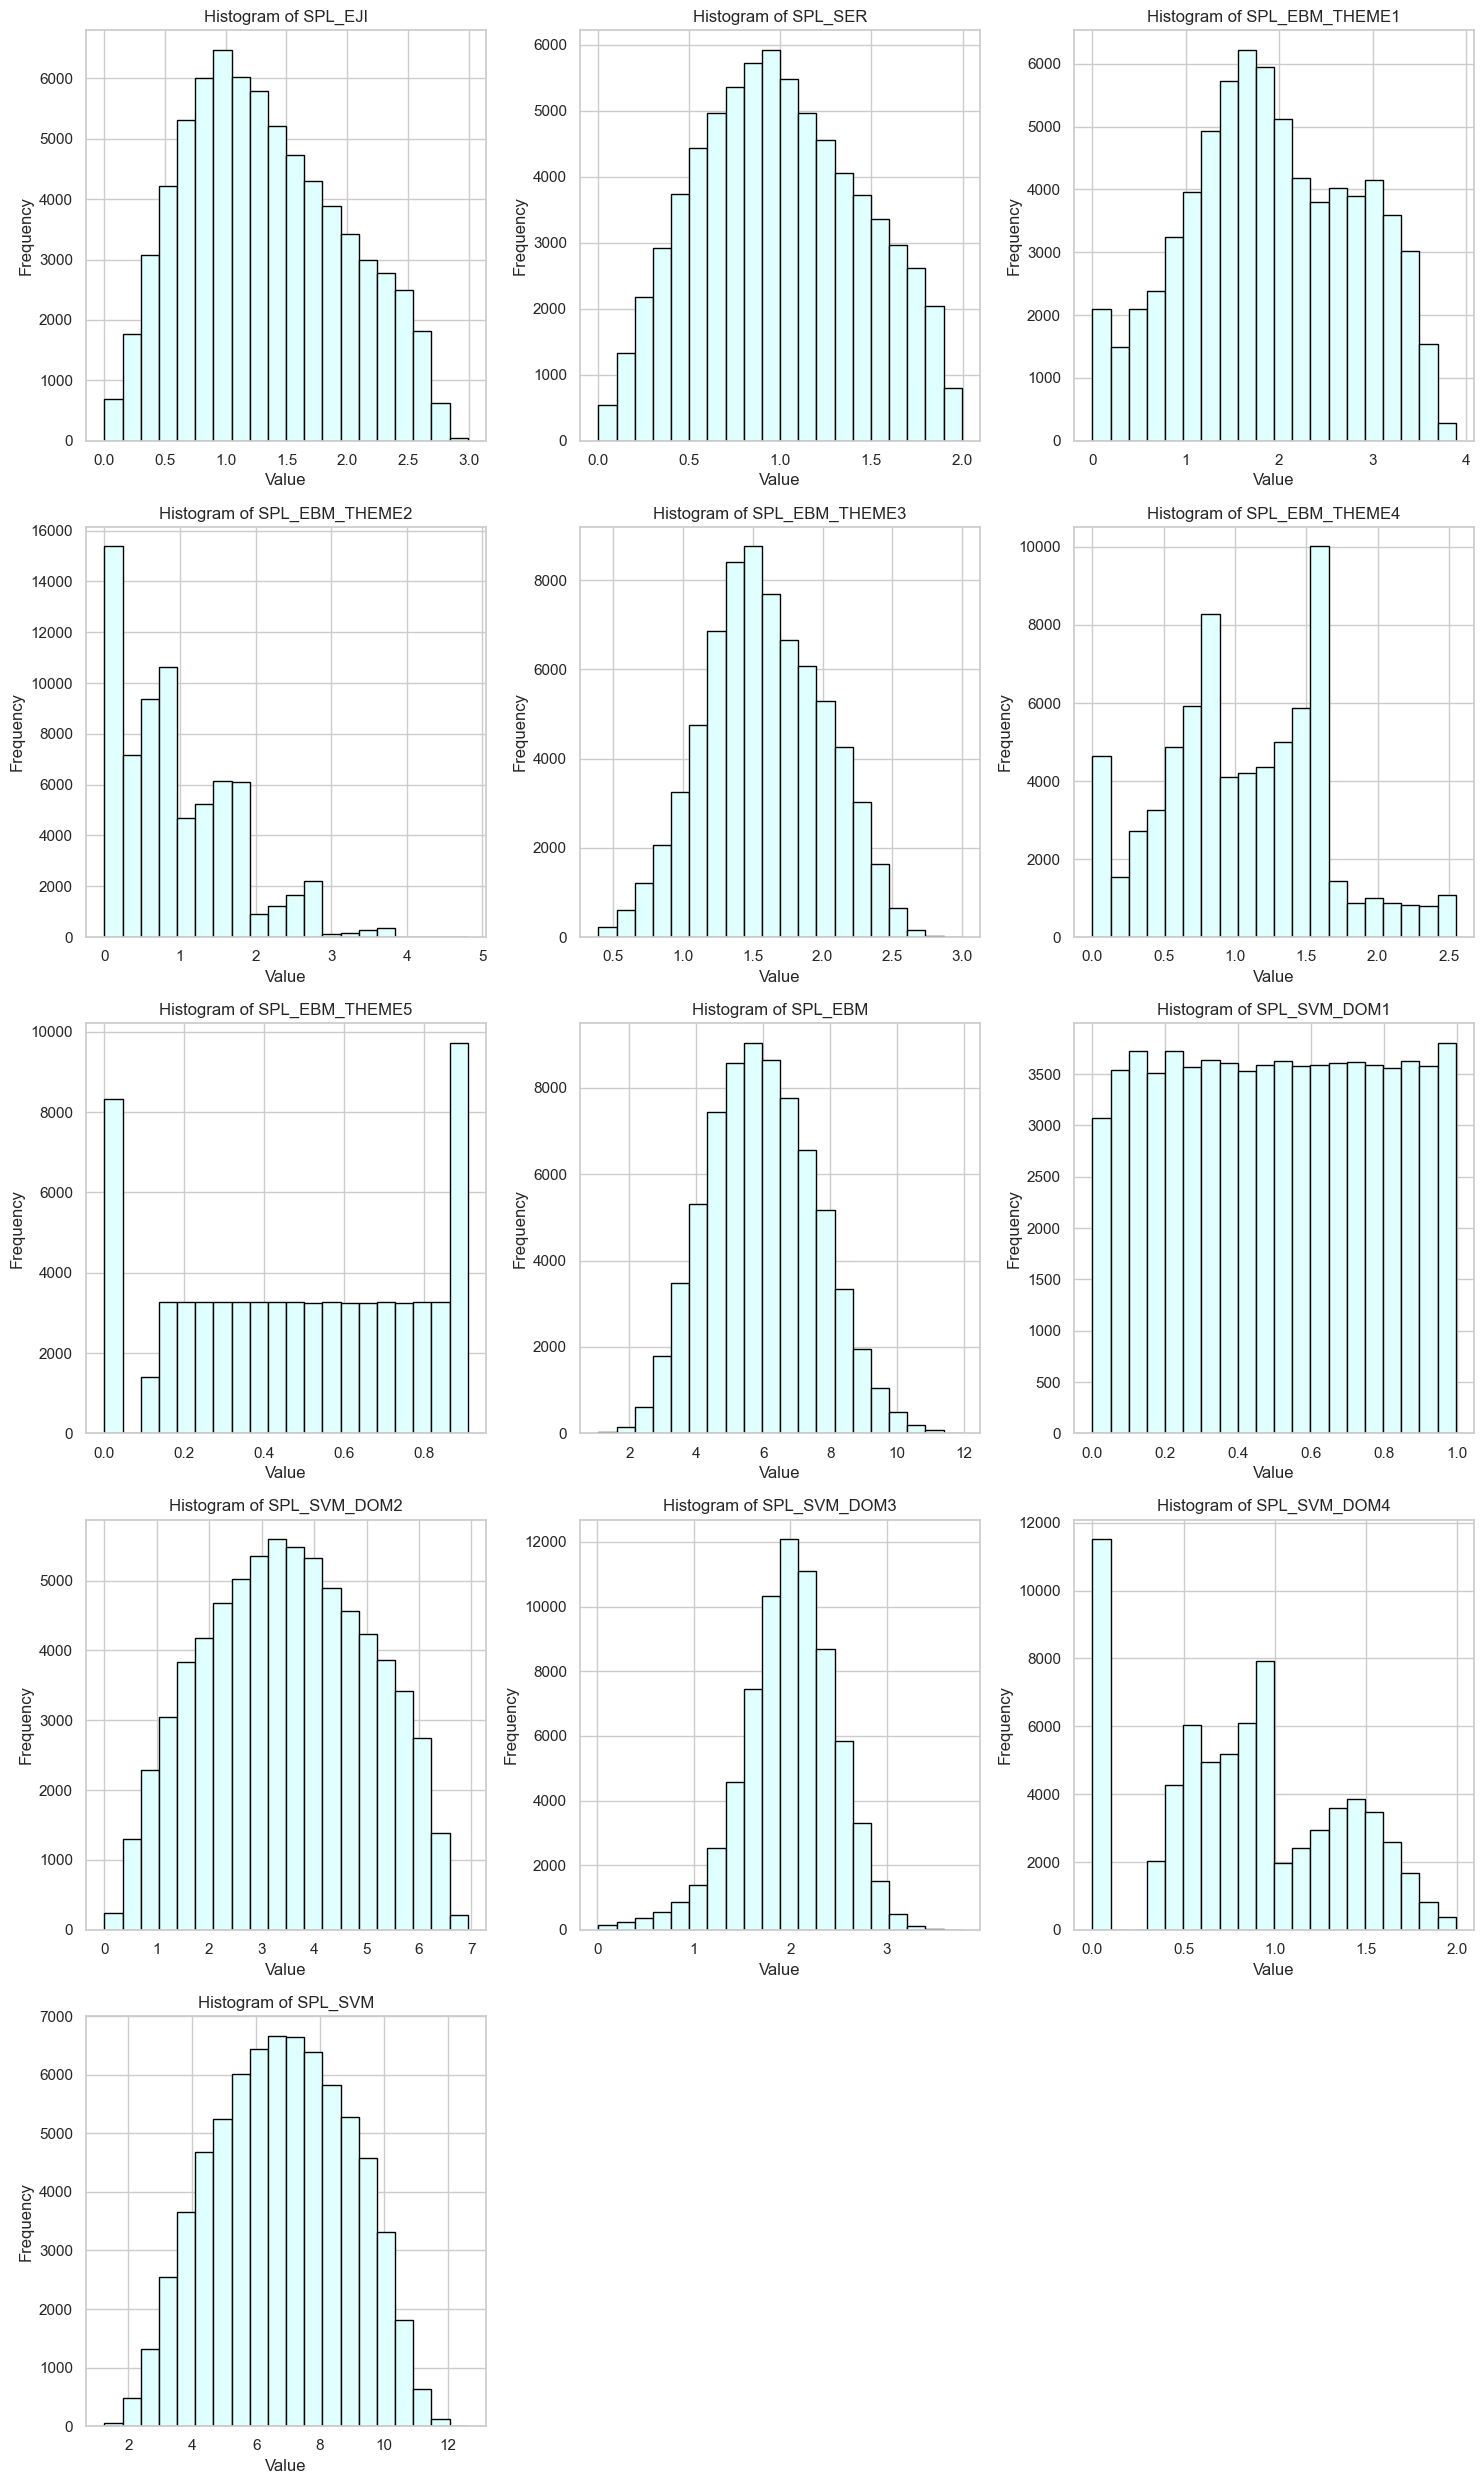

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# Filter the columns that start with 'SPL'
spl_columns = data_cleaned.filter(regex='^SPL', axis=1)

n_cols = 3  
n_rows = len(spl_columns.columns) // n_cols + (len(spl_columns.columns) % n_cols > 0)  # Calculate the number of rows needed

# Create a figure and axis grid for the histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() 

# Plot histograms for each SPL column
for i, column in enumerate(spl_columns.columns):
    axes[i].hist(spl_columns[column].dropna(), bins=20, color='lightcyan', edgecolor='black')  # Plot without NaN values
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for i in range(len(spl_columns.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


 Explain what insights you can gain from viewing the histograms of these columns.

SPL_EJI and SPL_SER:
These histograms show approximately normal distributions, peaking around the center of their range.
This suggests that most areas fall within moderate values, with fewer areas having very low or very high social vulnerability scores.

SPL_EBM_THEME1 and SPL_EBM_THEME3:
They have bell-shaped distributions, implying that most locations have moderate environmental burdens under these themes.
    
SPL_EBM_THEME2 and SPL_EBM_THEME4:
They are right-skewed, showing many areas with lower burdens and fewer areas with high burdens, 
which may highlight that only specific locations face elevated environmental challenges.

SPL_EBM_THEME5 is notably left-skewed, with most values concentrated at the lower end, suggesting that very few areas experience high burdens in this theme.
SPL_EBM has a bell-curve distribution, indicating a normal spread across the index values.

SPL_SVM_DOM1 and SPL_SVM_DOM4 have more even or bimodal distributions, suggesting that some dimensions of social vulnerability
are fairly evenly spread across locations.
    
SPL_SVM_DOM2 and SPL_SVM_DOM3:
They show more peaked, normal distributions, with most values concentrated around the center, 
indicating common vulnerability scores for these domains.

The final histogram for SPL_SVM has a near-normal distribution, suggesting an even spread across social vulnerability scores.

## Elbow Method for Clustering

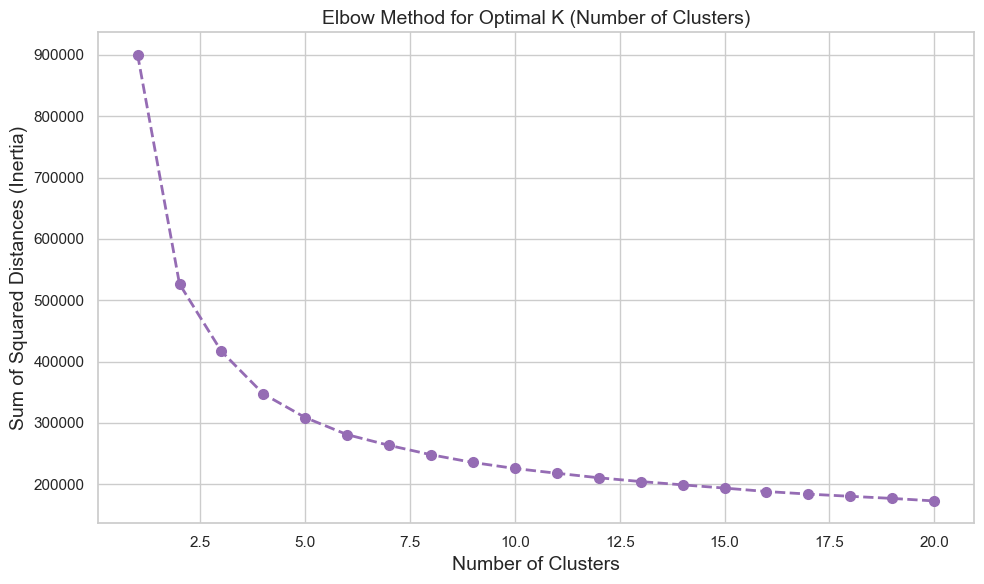

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

spl_cd = data_cleaned.filter(regex='^SPL', axis=1)

# List to store sum of squared distances
sosd = []

# Loop through a range of cluster numbers (1 to 20)
for n_clusters in range(1, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(spl_cd)  # Fit the KMeans model
    sosd.append(kmeans.inertia_) 

# Plot the sosd vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), sosd, marker='o', color='m', linestyle='--', linewidth=2, markersize=7)
plt.title('Elbow Method for Optimal K (Number of Clusters)', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Sum of Squared Distances', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

 What does the “elbow” in the plot represent?

In this plot, the elbow appears to be around 4 to 6 clusters, as this is where the rate of decrease in inertia slows down noticeably.
the "elbow" represents the optimal number of clusters, where adding more clusters does not significantly improve the model in terms of reducing the sum of squared distances (sosd). This is the point where the curve starts to flatten, indicating diminishing returns on the sosd reduction. Selecting the number of clusters at the elbow achieves a good balance between model simplicity (fewer clusters) and accuracy, making it an ideal choice for cluster count in K-means clustering.

# Part 6: Clustering and PCA

## K-Means Clustering

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
spl_scaled = scaler.fit_transform(spl_columns)

optimal_k = 3

# Fit the K-Means model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(spl_scaled)


data_cleaned.loc[:, 'Cluster_Label'] = kmeans.labels_

print(data_cleaned[['STATEFP', 'COUNTYFP', 'TRACTCE', 'NAME', 'Cluster_Label']].head())


   STATEFP  COUNTYFP  TRACTCE   NAME  Cluster_Label
0        1         1    20100  201.0              0
1        1         1    20200  202.0              0
2        1         1    20300  203.0              0
3        1         1    20400  204.0              1
4        1         1    20500  205.0              0


 What is the significance of clustering in analyzing environmental justice data?

Clustering is significant in analyzing environmental justice data because it analysis of environmental justice data by creating clusters of communities characterized by similar environmental and social problems. It draws attention to high-risk areas where local communities may be exposed to cumulative environmental burdens, such as pollution, combined with social vulnerability factors like poverty, inadequate access to health care, and so on. By unveiling these clusters of localities experiencing exposure to disproportionate stressors, policymakers are able to prioritize and match up resources that will best accomplish getting interventions into the most needy areas. In addition to revealing where help might be needed, clustering highlights hidden patterns that point to systemic inequities across regions, aiding the development of differentiated solutions for different environmental justice issues, such as air quality problems in urban settings versus water contamination issues in rural settings. In a nutshell, clustering is a simple way of reducing the complexity contained in the data; it clarifies inequities and thereby enables equitable decisions that are guided by data-hence enhancing public health outcomes. 

## Visualizing K-Mean Clusters

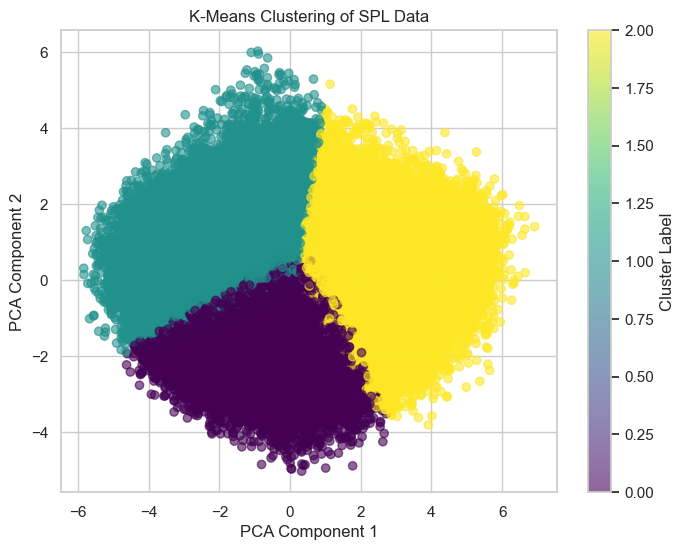

In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#visualization using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(spl_scaled)

# Create a scatter plot with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering of SPL Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


## Hierarchical Clustering

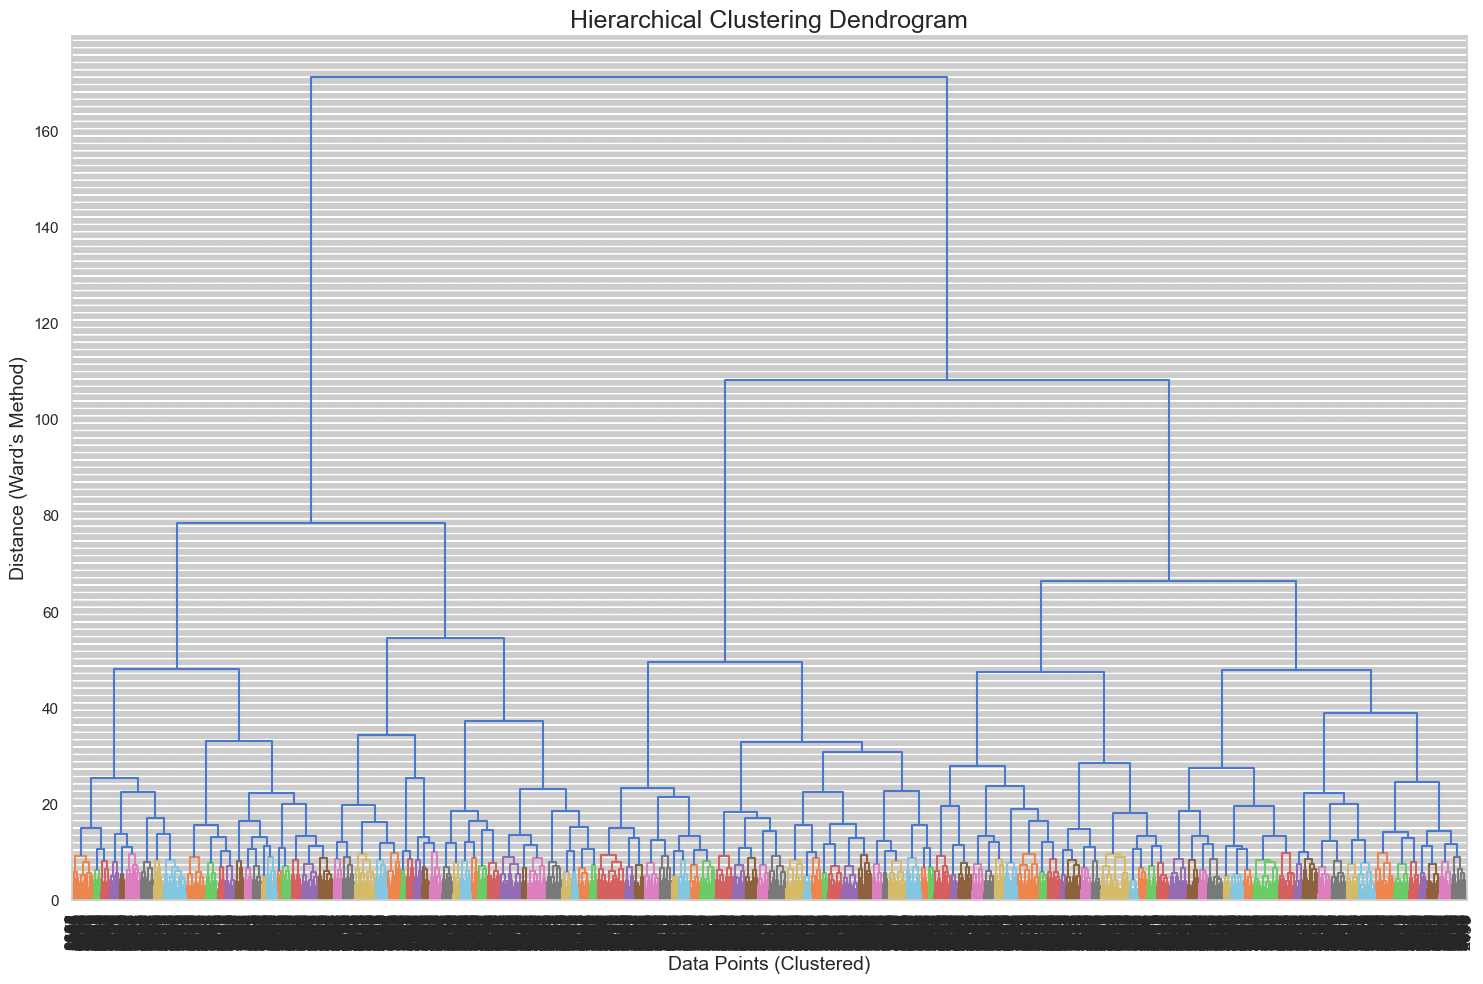

In [79]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

spl_columns = data_cleaned.filter(regex='^SPL', axis=1)

# Randomly select 5000 rows
random_sample = spl_columns.sample(n=5000, random_state=42)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(random_sample)


Z = linkage(scaled_data, method='ward') 

plt.figure(figsize=(15, 10)) 


dendro = dendrogram(
    Z,
    leaf_rotation=90,  
    leaf_font_size=12,  
    color_threshold=10,  
    orientation='top',  
    show_contracted=True  
)

plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Data Points (Clustered)', fontsize=14)
plt.ylabel('Distance (Ward’s Method)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


Hierarchical clustering is a bottom-up approach, where each data point starts as its own cluster and is merged with other clusters until all data points belong to a single cluster
K-means clustering, on the other hand, is a top-down approach, where the data is divided into k clusters based on the distance between data points.

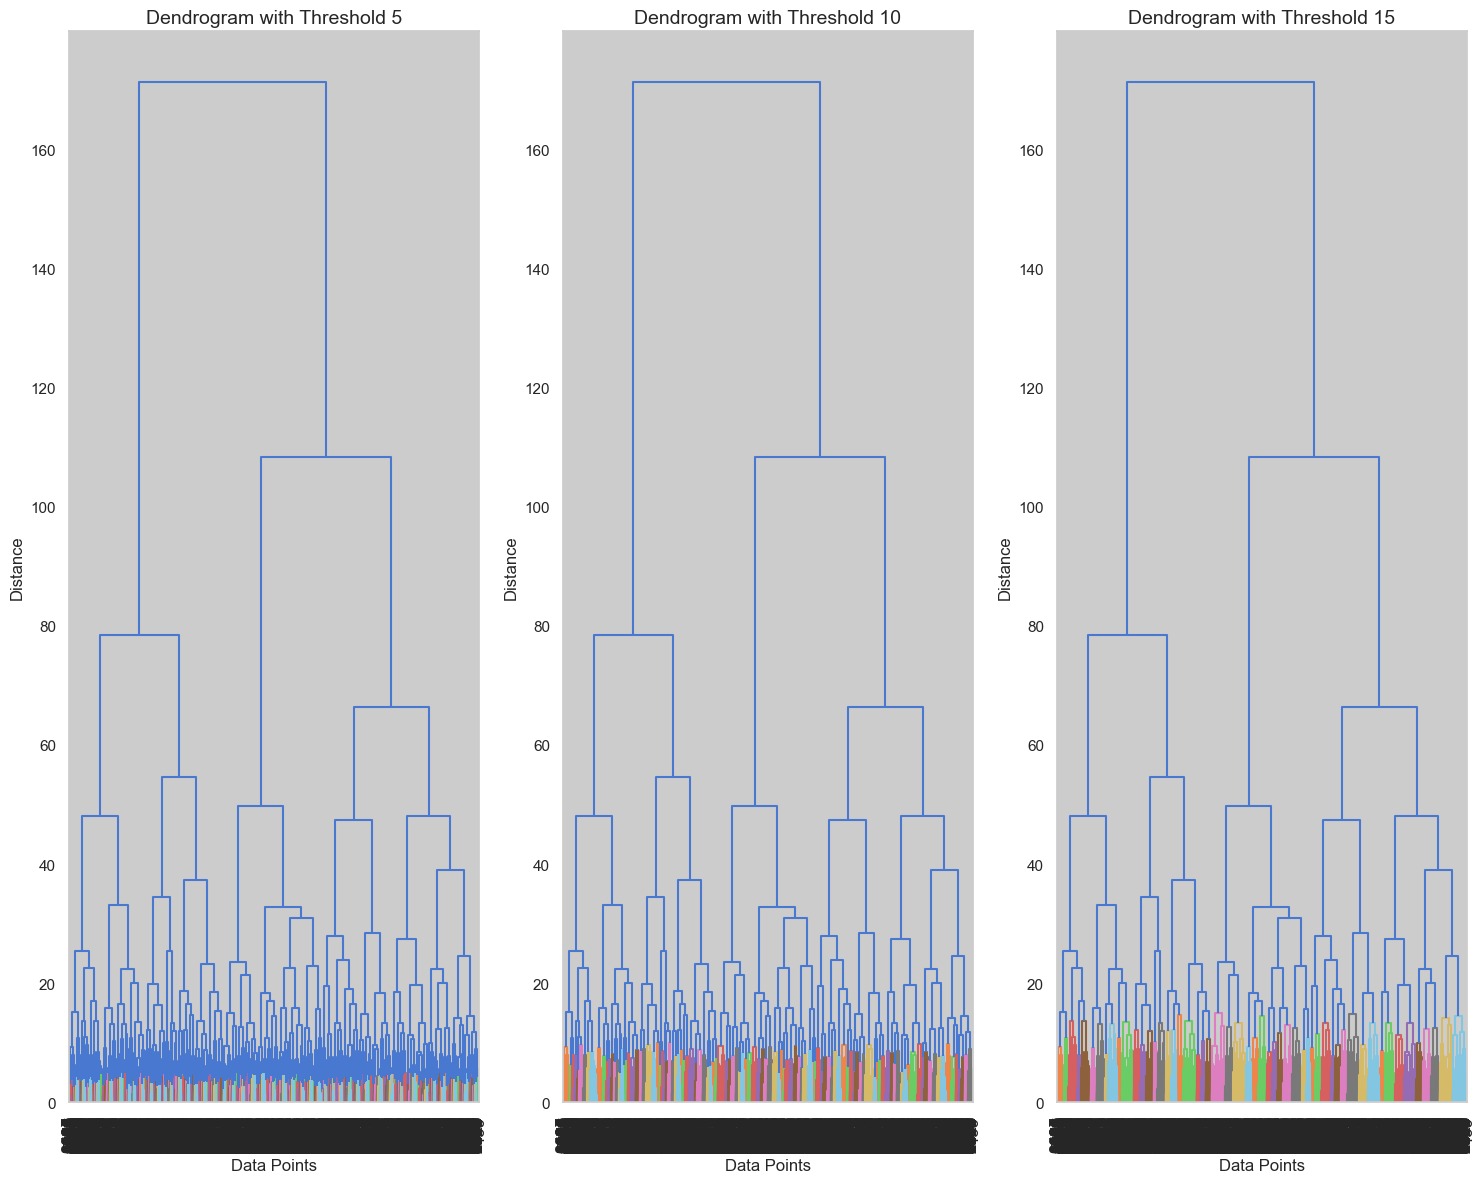

In [82]:

thresholds = [5, 10, 15]  

plt.figure(figsize=(15, 12))

for i, threshold in enumerate(thresholds):
    Z = linkage(scaled_data, method='ward')  
    
   
    plt.subplot(1, 3, i + 1)  
    dendrogram(
        Z,
        leaf_rotation=90,
        leaf_font_size=12,
        color_threshold=threshold, 
        orientation='top',
        show_contracted=True
    )
    plt.title(f'Dendrogram with Threshold {threshold}', fontsize=14)
    plt.xlabel('Data Points', fontsize=12)
    plt.ylabel('Distance', fontsize=12)

plt.tight_layout()  
plt.show()


## Principal Component Analysis (PCA)

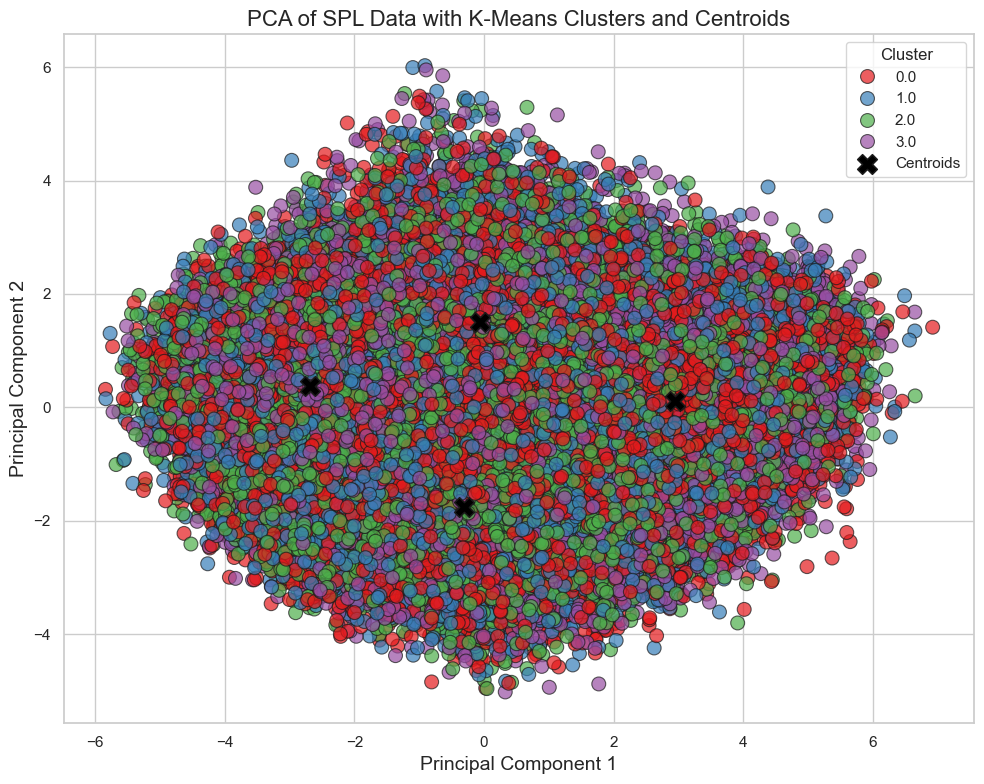

In [88]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


spl_columns = data_cleaned.filter(regex='^SPL', axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spl_columns)


pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])


kmeans = KMeans(n_clusters=4, random_state=42)
data_cleaned.loc[:, 'Cluster_Label'] = kmeans.fit_predict(scaled_data)  


plt.figure(figsize=(10, 8))

sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Label', data=pca_df.join(data_cleaned['Cluster_Label']), palette='Set1', s=100, alpha=0.7, edgecolor='k')


centroids = pca.transform(kmeans.cluster_centers_)


sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', s=200, marker='X', label='Centroids', edgecolor='k')

plt.title('PCA of SPL Data with K-Means Clusters and Centroids', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', loc='best')

# Display the plot
plt.tight_layout()
plt.show()


 How does PCA help in visualizing high-dimensional data?

Principal Component Analysis (PCA) is a dimensionality reduction technique that simplifies high-dimensional data for visualization and analysis. By transforming the data into a smaller set of orthogonal principal components, PCA retains the most significant patterns and variance. This allows for the reduction of complex, multi-dimensional datasets to 2D or 3D plots, making it easier to visualize relationships, clusters, and outliers. PCA captures the main trends in the data by ordering components based on the amount of variance they explain, with the first few components containing the most important information. It helps in identifying data patterns, detecting outliers, and visualizing clusters. By reducing dimensions, PCA simplifies the data while preserving key insights, enabling easier interpretation and understanding

# Part 7: Simulation and Validation

##  Simulating Clusters

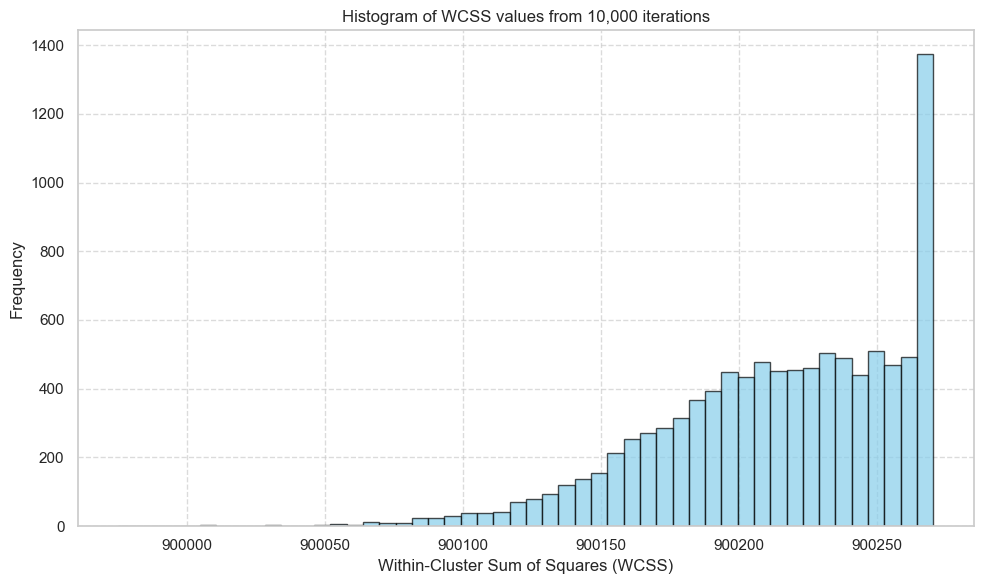

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

#Simulate clusters and calculate WCSS
def simulate_wcss(data, max_clusters=10, n_iterations=10000):
    wcss_values = []
    
    for _ in range(n_iterations):
      
        n_clusters = np.random.randint(1, max_clusters + 1)
        cluster_assignments = np.random.randint(0, n_clusters, len(data))
        
        wcss = 0
        for cluster in range(n_clusters):
            
            cluster_points = data[cluster_assignments == cluster]
            if len(cluster_points) > 0:
                
                centroid = cluster_points.mean(axis=0)
                
                distances = np.linalg.norm(cluster_points - centroid, axis=1)
                wcss += np.sum(distances**2)
        
       
        wcss_values.append(wcss)
    
    return wcss_values


wcss_values = simulate_wcss(spl_columns, n_iterations=10000)

plt.figure(figsize=(10, 6))
plt.hist(wcss_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of WCSS values from 10,000 iterations')
plt.xlabel('Within-Cluster Sum of Squares (WCSS)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Why might this simulation be important for validating clustering results?

This simulation is important for validating clustering results as it displays the distribution of WCSS values, highlights the impact of random centroid initialization in k-means clustering. As WCSS values vary, it suggests that the clustering outcome can be influenced by initial conditions. This insight is vital for assessing whether the final cluster assignments truly reflect the underlying patterns in the data.

By comparing the WCSS distribution to the optimal clustering result, we can assess whether the algorithm is producing consistent and robust results. If there is a large spread in the WCSS values, it might suggest that the clustering algorithm is unstable or that the data is difficult to cluster, and further analysis is needed 

## Hold-Out Data Validation

In [95]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


spl_columns = data_cleaned.filter(regex='^SPL', axis=1).values  
X_train, X_holdout = train_test_split(spl_columns, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)  


n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_scaled)


holdout_l = kmeans.predict(X_holdout_scaled)

holdout_counts = pd.Series(holdout_l).value_counts().sort_index()
print("Cluster counts in the hold-out data:")
print(holdout_counts)


Cluster counts in the hold-out data:
0    1651
1    2508
2    1974
3    2435
4    2184
Name: count, dtype: int64


 Why is it important to test clustering results on hold-out data?

Testing clustering results on hold-out data is important because it ensures that the model can generalize well to unseen data, preventing overfitting. It helps verify that the clusters formed during training are stable, meaningful, and not just specific to the training set. By using a hold-out set, we avoid data leakage and ensure that the model's performance is evaluated honestly, without being influenced by the test data during training. Additionally, it checks the stability of the clusters, confirming that the model's findings are consistent across different subsets of data.